# Multiome Analysis -PART3 Integration

# Setup

In [33]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
import bbknn
from pathlib import Path
sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

import muon as mu
from muon import prot as pt

%matplotlib inline
import panel as pn
#pn.extension(sizing_mode="stretch_width", comms='colab')
pn.extension( comms='colab')


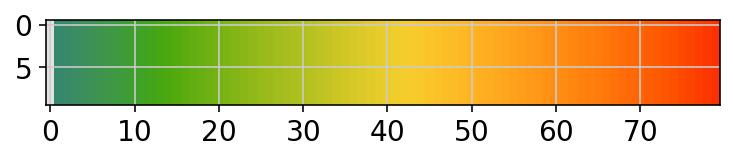

In [34]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [35]:
# add extra code to the path
import sys
sys.path.append('/content/sctoolkit/sctoolkit/')
from proportions import *

In [36]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,pysam

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2022-07-13T19:06:02.516142+00:00

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.3.0

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.13.0-1031-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.3.0

numpy  : 1.21.6
scipy  : 1.8.0
sklearn: 0.0
anndata: 0.7.8
scanpy : 1.9.1
muon   : 0.1.2
pysam  : 0.19.1

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.13.0-1031-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

numpy     : 1.21.6
colorcet  : 3.0.0
mofax     : 0.3.6
scanpy    : 1.9.1
anndata2ri: 1.1
bbknn     : 1.5.1
scipy     : 1.8.0
logging   : 0.5.1.2
panel     : 0.13.1
muon      : 0.1.2
sys       : 3.9.12 | packaged by conda-forge | (main, Mar 24 2022, 23:25:59) 
[GCC 10.

%cd Multiome# Setup WD

In [37]:
%cd Multiome

[Errno 2] No such file or directory: 'Multiome'
/home/jovyan/work/Multiome


In [38]:
#Change XXX to sample name
#folder='/content/'
samplename='Cell_Lines_all_Multiome'
random_state=42

import os

if not os.path.exists('./figures/'):
    os.makedirs('./figures/')

# import data as H5AD

In [39]:
mdata = mu.read("Cell_lines.h5mu")
mdata

MuData object with n_obs × n_vars = 3395 × 181977
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'highly_variable'
  2 modalities
    rna:	2901 x 21202
      obs:	'sample', 'group', 'doublet_score', 'predicted_doublet', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r0.1', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
      uns:	'annotated_colors', 'dendrogram_leiden_r0.1', 'group_colors', 'hvg', 'leiden', 'leiden_r0.1_colors', 'leiden_r0.2_colors', 'leiden_r0.4_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'sample_colors', 'scrublet', 'umap', 'wilcoxon'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'normalized', 'raw', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    atac:	2035 x 160775
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'leiden', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'annotated_colors', 'atac', 'files', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

# Intersect RNA layer with Atac-Seq

In [40]:
mu.pp.intersect_obs(mdata)

In [41]:
mdata.shape

(1541, 181977)

# Compare cell type annotation


The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [42]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:annotated'], mdata.obs['atac:annotated'])

0.9590829032347721

In [43]:
# Calculate total number of cells of respective ATAC celltypes
df_total = (
    mdata.obs.groupby("atac:annotated").
        size().
        reset_index(name="n_total").
        set_index("atac:annotated")
)

# Calculate number of cells for each pair of RNA-ATAC celltype annotation
df = (
    mdata.obs.groupby(["atac:annotated", "rna:annotated"]).
        size().
        reset_index(name="n").
        set_index("atac:annotated").
        join(df_total).
        reset_index()
)

# Calculate a fraction of cells of each RNA celltype (n)
# for each ATAC celltype (/ n_total)
df_frac = df.assign(frac = lambda x: x.n / x.n_total)

In [44]:
df_total

,n_total
atac:annotated,
Cell_line_1,127
Cell_line_2,162
Cell_line_3,165
Cell_line_4,821
Cell_line_5,266


In [45]:
df_wide = df_frac.set_index("atac:annotated").pivot(columns="rna:annotated", values="frac")

<AxesSubplot:xlabel='rna:annotated', ylabel='atac:annotated'>

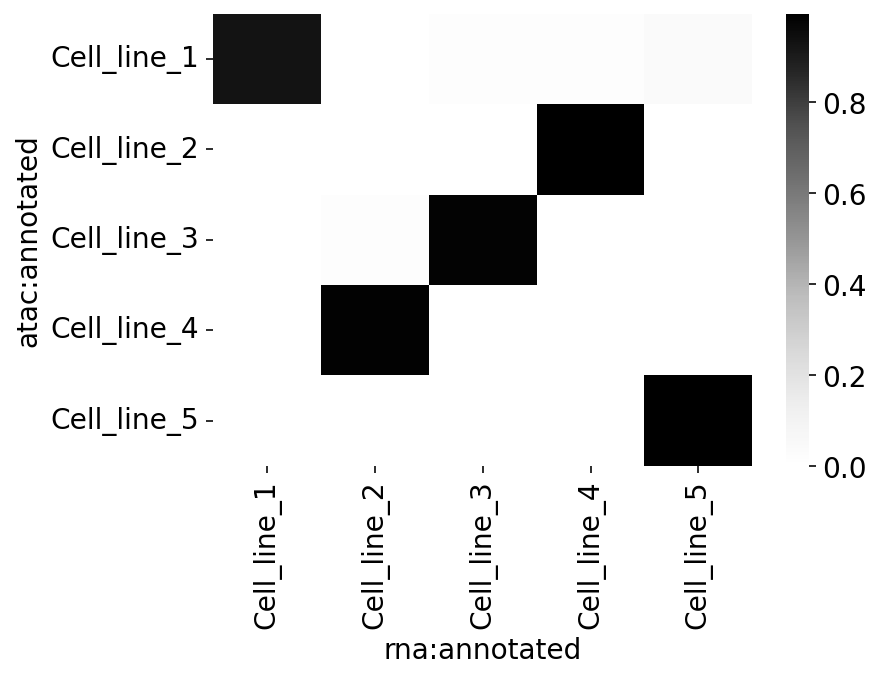

In [46]:

sb.heatmap(df_wide, cmap="Greys")

# Perform integration

In [47]:
#if not os.path.exists('./models/'):
#    os.makedirs('./models/')
#mu.tl.mofa(mdata, outfile="models/cell_lines.hdf5",gpu_mode=True,n_factors=30)

In [48]:
import mofax as mfx
model = mfx.mofa_model('/home/jovyan/work/shared-data/Multiome_Results/Model/cell_lines.hdf5')
mdata.obsm["X_mofa"] = model.get_factors()

# # If only highly variable features were used
# w = model.get_weights()
# # Set the weights of features that were not used to zero
# mdata.varm["LFs"] = np.zeros(shape=(mdata.n_vars, w.shape[1]))
# mdata.varm["LFs"][mdata.var["highly_variable"]] = w

# model.close()

In [49]:
mdata

MuData object with n_obs × n_vars = 1541 × 181977
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'highly_variable'
  obsm:	'X_mofa'
  2 modalities
    rna:	1541 x 21202
      obs:	'sample', 'group', 'doublet_score', 'predicted_doublet', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'leiden_r0.1', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
      uns:	'annotated_colors', 'dendrogram_leiden_r0.1', 'group_colors', 'hvg', 'leiden', 'leiden_r0.1_colors', 'leiden_r0.2_colors', 'leiden_r0.4_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'sample_colors', 'scrublet', 'umap', 'wilcoxon'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'normalized', 'raw', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    atac:	1541 x 160775
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'leiden', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'annotated_colors', 'atac', 'files', 'group_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [50]:
mdata.obsm['X_mofa'].shape

(1541, 30)

In [51]:
# Copy colours that were defined previously
mdata.uns = mdata.uns or dict()
mdata.uns['rna:annotated_colors'] = mdata['rna'].uns['annotated_colors']
mdata.uns['atac:annotatede_colors'] = mdata['atac'].uns['annotated_colors']

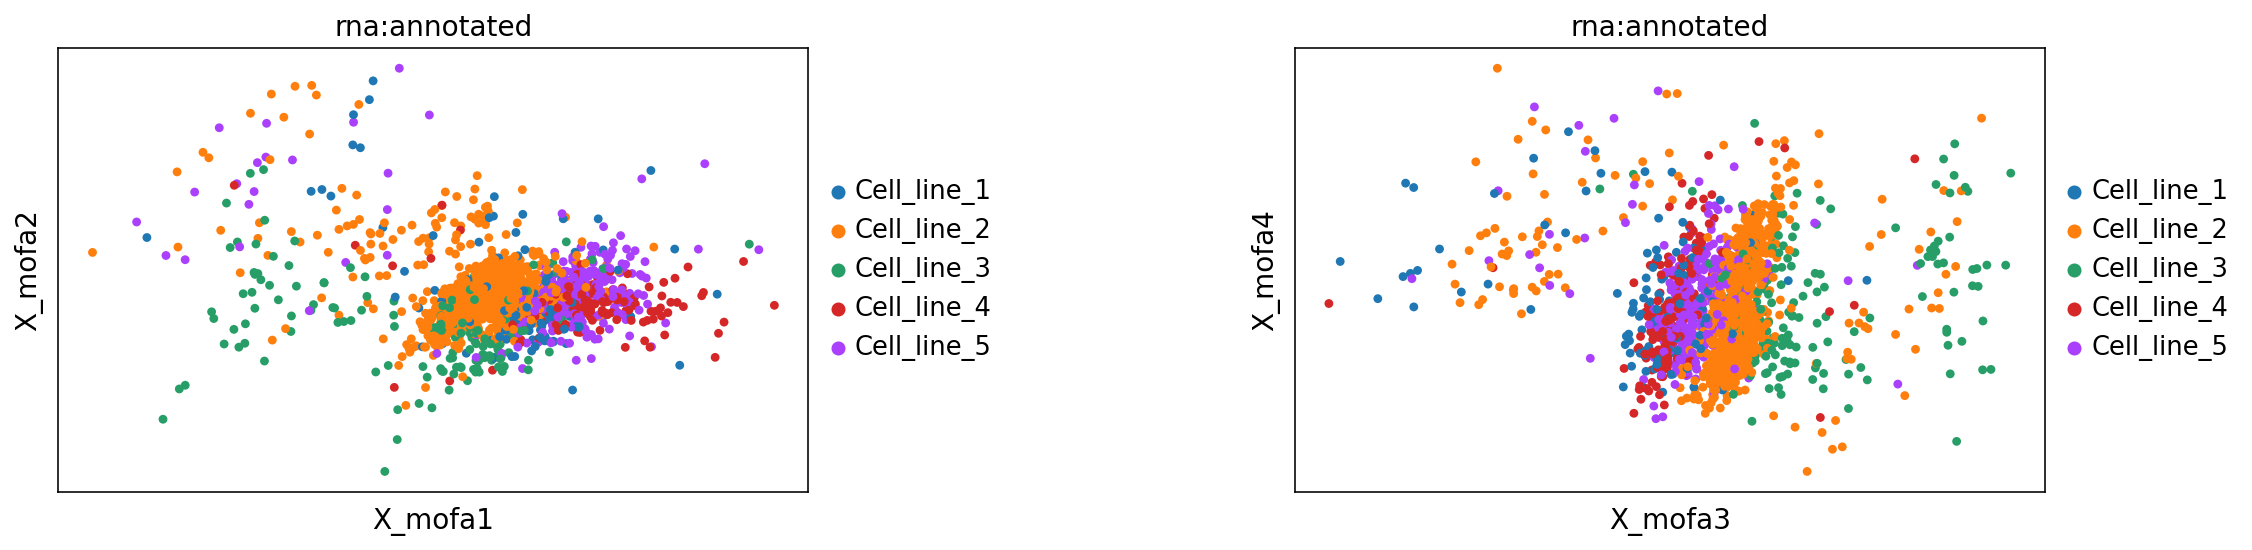

In [52]:
mu.pl.mofa(mdata, color="rna:annotated", components=["1,2", "3,4"],wspace=0.5)
# 'rna:celltype' is a column in mdata.obs
# derived from the 'celltype' column of mdata['rna'].obs

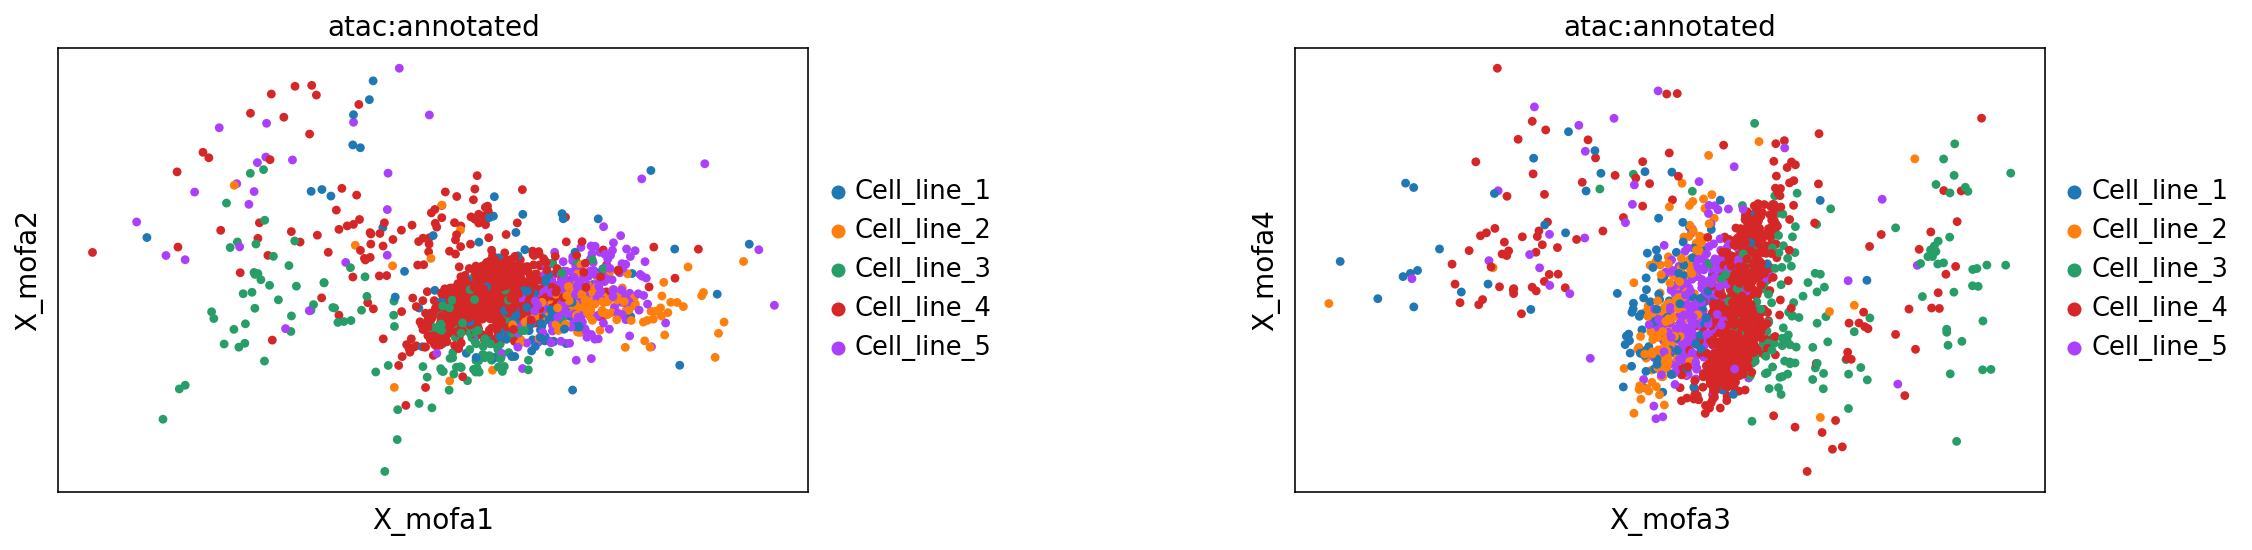

In [53]:
mu.pl.mofa(mdata, color="atac:annotated", components=["1,2", "3,4"],wspace=0.5) #sig in RNA and atac 
# 'atac:celltype' is a column in mdata.obs
# derived from the 'celltype' column of mdata['atac'].obs

In [54]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata, random_state=1)

In [58]:
mdata.obsm["X_mofa_umap"] = mdata.obsm["X_umap"]

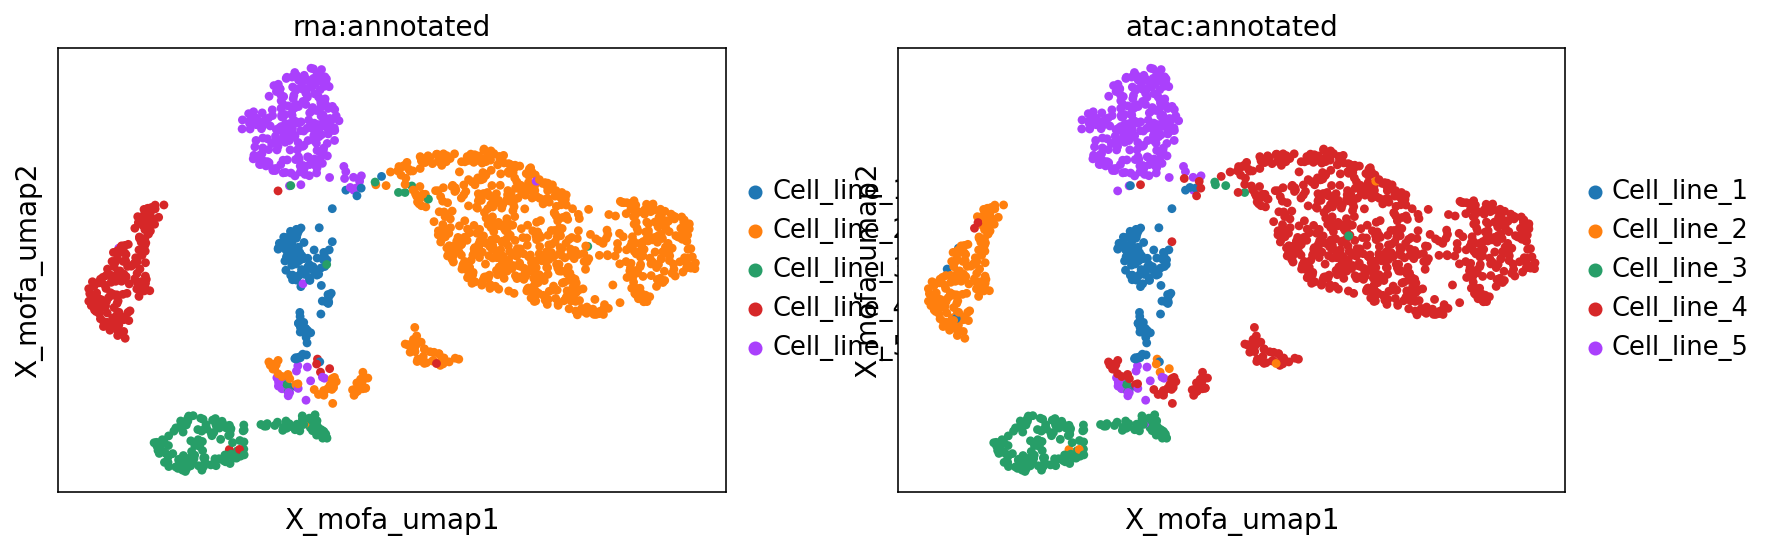

In [59]:
mu.pl.embedding(mdata, basis="X_mofa_umap", color=["rna:annotated", "atac:annotated"])

In [60]:
# Since subsetting was performed after calculating nearest neighbours,
# we have to calculate them again for each modality.
sc.pp.neighbors(mdata['rna'])
sc.pp.neighbors(mdata['atac'])

# Calculate weighted nearest neighbors
mu.pp.neighbors(mdata, key_added='wnn')

In [61]:
# Since subsetting was performed after calculating nearest neighbours,
# we have to calculate them again for each modality.
sc.pp.neighbors(mdata['rna'])
sc.pp.neighbors(mdata['atac'])

# Calculate weighted nearest neighbors
mu.pp.neighbors(mdata, key_added='wnn')

In [62]:
mdata.obsm["X_mofa_umap"] = mdata.obsm["X_umap"]

... storing 'feature_types' as categorical
... storing 'interval' as categorical


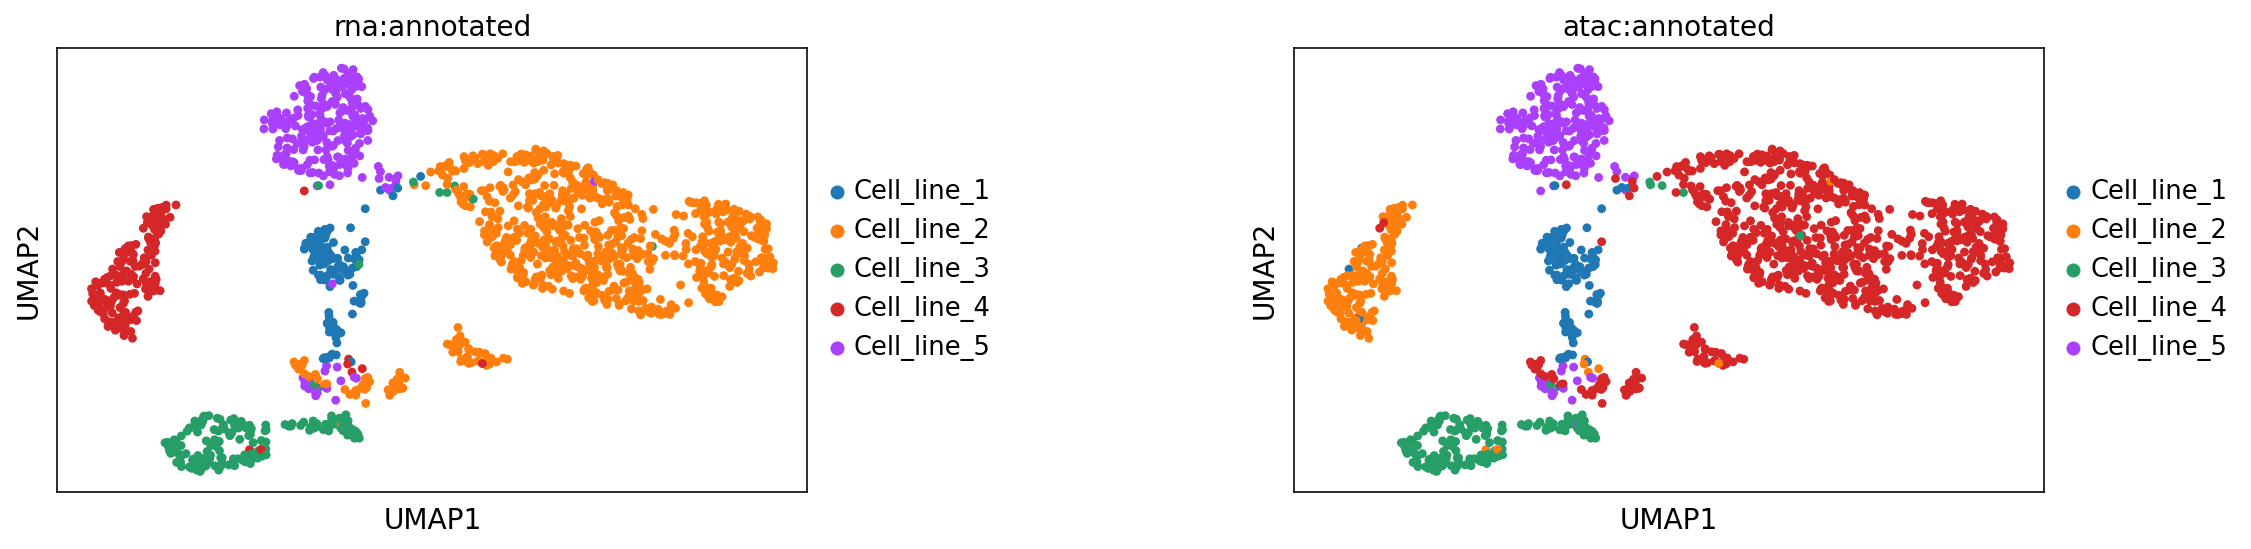

In [63]:
sc.pl.umap(mdata, color=["rna:annotated", "atac:annotated"],wspace=0.5)

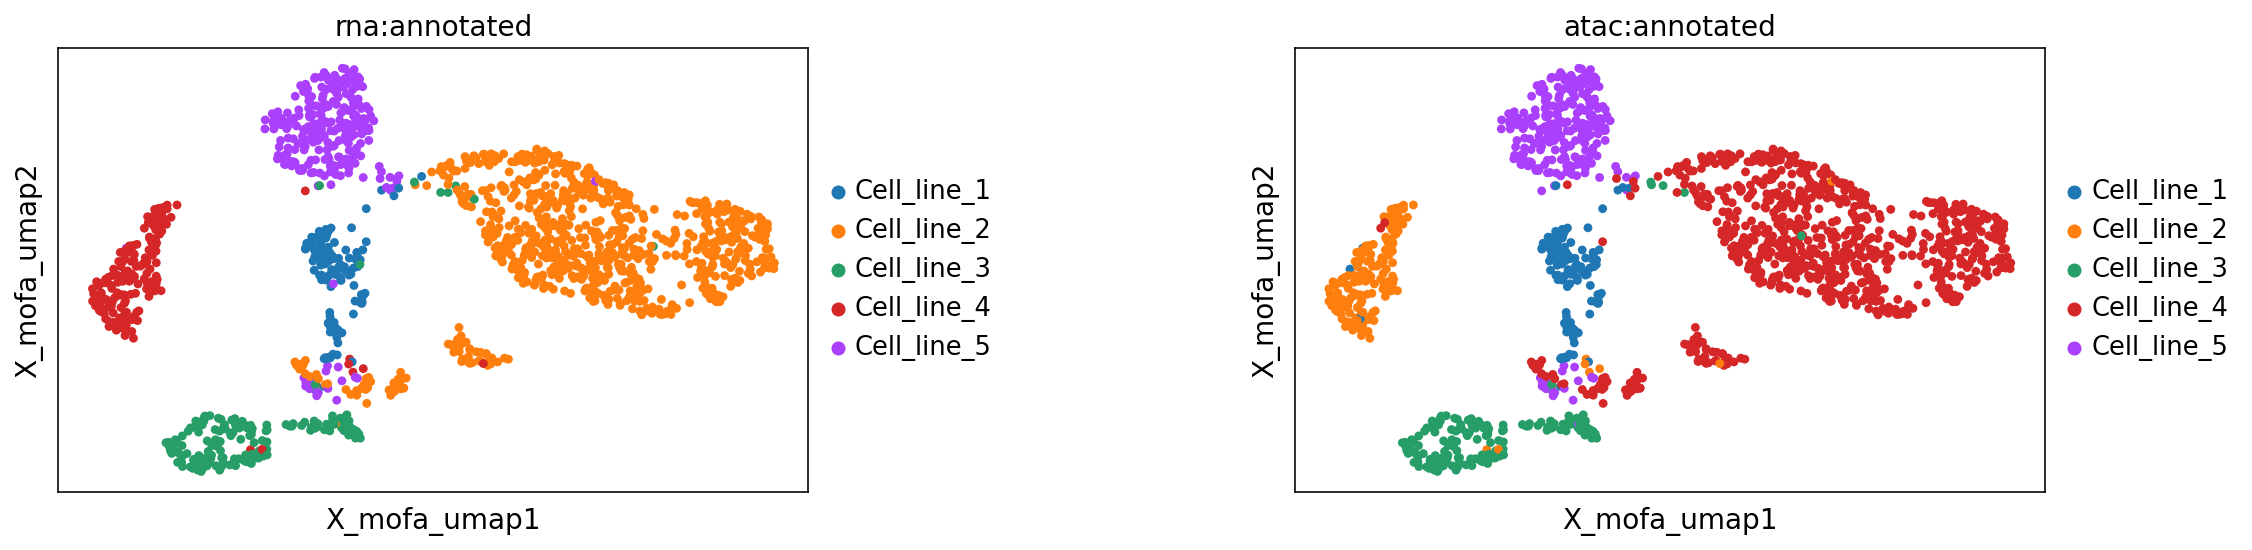

In [64]:
mu.pl.embedding(mdata, basis="X_mofa_umap", color=["rna:annotated", "atac:annotated"],wspace=0.5)

In [65]:
mu.tl.umap(mdata, neighbors_key='wnn', random_state=10)

In [66]:
mdata.obsm["X_wnn_umap"] = mdata.obsm["X_umap"]

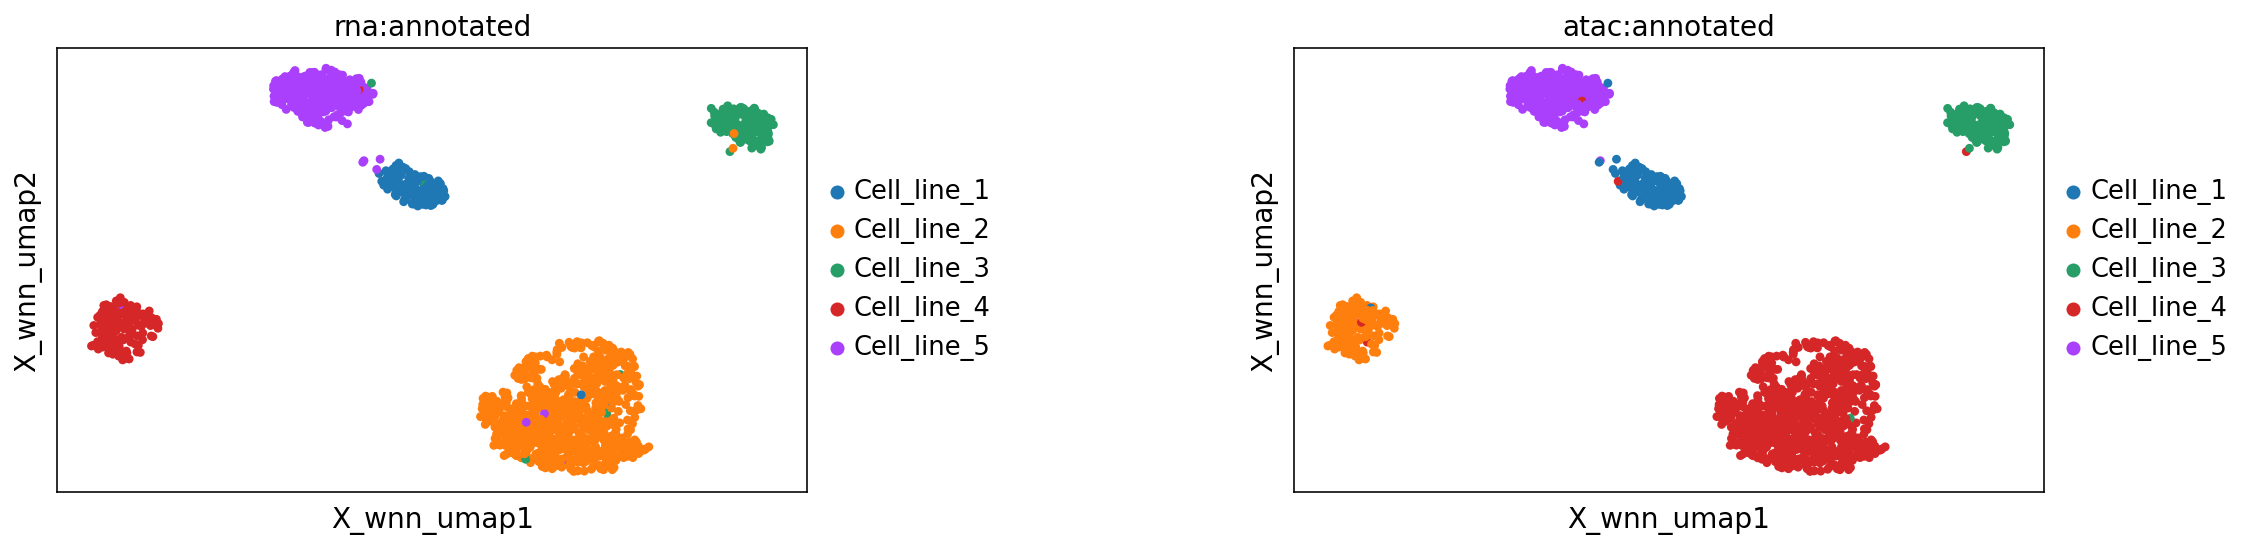

In [67]:
mu.pl.embedding(mdata, basis="X_wnn_umap", wspace=0.5, color=["rna:annotated", "atac:annotated"])

In [68]:
sc.tl.leiden(mdata,resolution=0.1, key_added='leiden_joint')

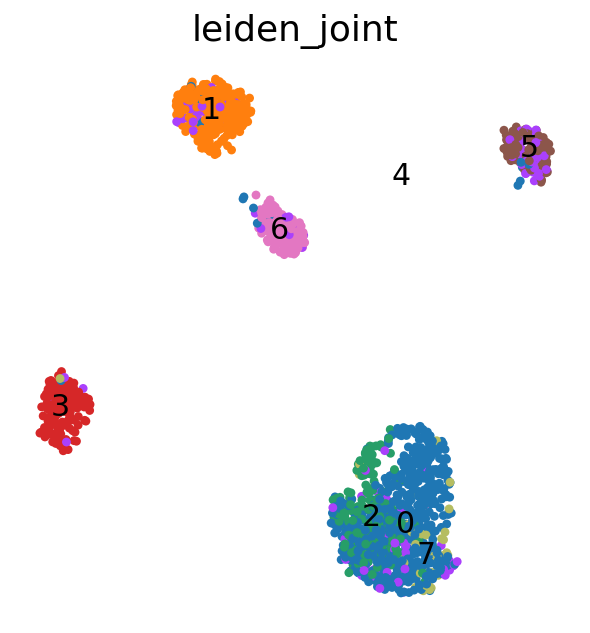

In [69]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(5,5)
sc.pl.umap(mdata, color="leiden_joint",legend_fontsize='small', legend_fontweight='normal',frameon=False, legend_loc='on data')

# Define marker genes

In [ ]:
marker_genes=

In [ ]:
ac.pl.dotplot(atac, marker_genes, groupby='celltype')

# Annotate cell types

Transfer the joint space into the individual layers

In [92]:
mdata['rna'].obs['leiden_joint'] = mdata.obs.leiden_joint
mdata['atac'].obs['leiden_joint'] = mdata.obs.leiden_joint

# Ranking genes and peaks

Calculate marker genes in the joint space

In [93]:
sc.tl.rank_genes_groups(mdata['rna'], 'leiden_joint', method='t-test_overestim_var')

In [94]:
from muon import atac as ac
ac.tl.rank_peaks_groups(mdata['atac'], 'leiden_joint', method='t-test_overestim_var')

# Listing differentially expressed genes and differentially accessible peaks¶

In [95]:
result = {}
result['rna'] = mdata['rna'].uns['rank_genes_groups']
result['rna']['genes'] = result['rna']['names']
result['atac'] = mdata['atac'].uns['rank_genes_groups']

groups = result['rna']['names'].dtype.names
pd.set_option("max_columns", 200)
pd.DataFrame(
    {mod + ':' + group + '_' + key[:1]: result[mod][key][group][:10]
    for group in groups for key in ['names', 'genes', 'pvals']
    for mod in mdata.mod.keys()})

,rna:0_n,atac:0_n,rna:0_g,atac:0_g,rna:0_p,atac:0_p,rna:1_n,atac:1_n,rna:1_g,atac:1_g,rna:1_p,atac:1_p,rna:2_n,atac:2_n,rna:2_g,atac:2_g,rna:2_p,atac:2_p,rna:3_n,atac:3_n,rna:3_g,atac:3_g,rna:3_p,atac:3_p,rna:4_n,atac:4_n,rna:4_g,atac:4_g,rna:4_p,atac:4_p,rna:5_n,atac:5_n,rna:5_g,atac:5_g,rna:5_p,atac:5_p
0,LINC01320,chr3:73437690-73438585,LINC01320,PDZRN3,1.401593e-144,2.470771e-62,LINC02109,chr8:66546352-66547261,LINC02109,VXN,2.342924e-31,2.202656e-14,CD9,chr3:75435038-75435941,CD9,LINC02018,4.100795e-53,4.266400e-27,HSP90AB1,chr8:29615004-29615873,HSP90AB1,AC084026.1,2.750483e-48,1.528296e-13,DLC1,chr14:28766185-28767108,DLC1,FOXG1,1.542895e-30,6.330080e-09,LINC01320,chr7:45111337-45112262,LINC01320,TBRG4,0.000069,0.001521
1,SGO1-AS1,chr7:2298738-2299648,SGO1-AS1,SNX8,3.970721e-79,1.325502e-38,COL3A1,chr1:115179238-115180096,COL3A1,LINC01765,4.212945e-31,1.804356e-12,TIMP2,chr18:23994213-23995132,TIMP2,"TTC39C, TTC39C-AS1",9.179834e-56,1.098700e-18,SMS,chr8:38012836-38013755,SMS,EIF4EBP1,4.474992e-45,1.963389e-11,C5orf17,chr7:157564570-157565410,C5orf17,"AC005481.1, PTPRN2",2.319754e-28,9.505517e-09,DLGAP1,chr20:22983858-22984712,DLGAP1,AL049651.1,0.001011,0.003819
2,ABCB5,chr3:57597107-57598026,ABCB5,"ARF4-AS1, ARF4",3.237966e-75,4.919838e-37,SEMA3A,chr8:66123643-66124562,SEMA3A,TRIM55,3.058475e-29,2.343940e-12,LYST,chr12:5096031-5096943,LYST,AC005906.3,2.398867e-52,8.165229e-18,NRG3,chr4:21173516-21174403,NRG3,KCNIP4,2.298937e-44,3.142359e-11,TIMP3,chr20:61555721-61556700,TIMP3,CDH4,6.986646e-27,1.392091e-08,TYR,chr3:107884724-107885621,TYR,"LINC00636, LINC00635",0.002148,0.004473
3,ROBO2,chr3:58032009-58032916,ROBO2,FLNB,1.625734e-67,2.729664e-36,IGFBP2,chr7:36303144-36304018,IGFBP2,AC006960.3,7.924227e-29,3.139049e-12,UBE2K,chr12:6533384-6534035,UBE2K,AC006064.3,1.122415e-54,3.650842e-16,PMEL,chr15:89462282-89463169,PMEL,RHCG,1.196174e-44,1.107084e-10,COL1A2,chr8:73202851-73203594,COL1A2,C8orf89,1.336742e-26,1.946947e-08,ST6GALNAC3,chr1:9593272-9594154,ST6GALNAC3,TMEM201,0.002942,0.004108
4,SLMAP,chr7:157289322-157290043,SLMAP,AC004975.2,1.102814e-57,1.931524e-31,COL1A1,chr8:61053939-61054839,COL1A1,AC022182.2,2.659281e-28,8.052320e-12,SQSTM1,chr11:119095124-119095962,SQSTM1,H2AFX,2.138900e-49,7.266262e-16,APOE,chr22:16601046-16601791,APOE,AP000547.3,5.294015e-42,1.665748e-10,MIR100HG,chr12:12333214-12334085,MIR100HG,MANSC1,6.412798e-25,2.056332e-08,ROBO2,chr1:165592635-165593548,ROBO2,AL356441.1,0.009782,0.006013
5,ST6GALNAC3,chr7:42649825-42650708,ST6GALNAC3,LINC01448,1.266167e-51,2.259358e-30,COLEC12,chr7:19958026-19958844,COLEC12,AC005062.1,6.352091e-27,2.107463e-11,PLCG2,chr3:64109228-64110146,PLCG2,"PRICKLE2, PRICKLE2-AS2",3.444062e-53,8.680767e-16,MT-ND2,chr6:41494430-41495330,MT-ND2,LINC01276,1.634982e-47,2.277696e-10,BCAT1,chr12:10031377-10032238,BCAT1,CLEC9A,1.144463e-23,2.039629e-08,OCA2,chr22:38172482-38173336,OCA2,PLA2G6,0.019260,0.005630
6,DLGAP1,chr3:57692409-57693333,DLGAP1,"DENND6A, DENND6A-DT",6.756748e-52,3.505369e-30,S100A4,chr8:141227879-141228628,S100A4,SLC45A4,1.097837e-26,4.264315e-11,HLA-B,chr12:6851900-6852796,HLA-B,"CDCA3, USP5",1.291686e-48,7.782223e-16,MAGEA4,chr6:42260441-42261352,MAGEA4,"TRERF1, MRPS10",1.888902e-38,1.778868e-10,SYT1,chr12:33795391-33796355,SYT1,,2.523806e-24,1.892840e-08,KDM4C,chr12:92158646-92159565,KDM4C,AC025164.1,0.032412,0.006209
7,EBF3,chr3:59391801-59392698,EBF3,"AC126121.3, AC138057.1",1.088035e-48,1.453808e-29,LYPD6B,chr8:73419595-73420404,LYPD6B,"STAU2, STAU2-AS1",1.757114e-26,4.529222e-10,RPS25,chr12:6336085-6336919,RPS25,TNFRSF1A,8.065028e-50,3.604335e-15,LHFPL3-AS1,chr20:32457011-32457857,LHFPL3-AS1,"AL034550.1, NOL4L",9.161683e-43,4.191099e-10,COL5A2,chr22:32712583-32713456,COL5A2,"Z73495.1, SYN3",1.106145e-22,2.338821e-08,SNX8,chr7:2863326-2864203,SNX8,GNA12,0.032979,0.006110
8,CNTN1,chr7:601296-602222,CNTN1,"AC147651.4, PRKAR1B",6.129430e-48,1.498398e-28,EDIL3,chr1:222546607-222547496,EDIL3,HHIPL2,2.854144e-25,4.196013e-10,QPRT,chr18:23115440-23116329,QPR

# Exercise define a new set of markers for annotatting your cells using the joint space 

In [96]:
marker_joint=['LINC01320',]


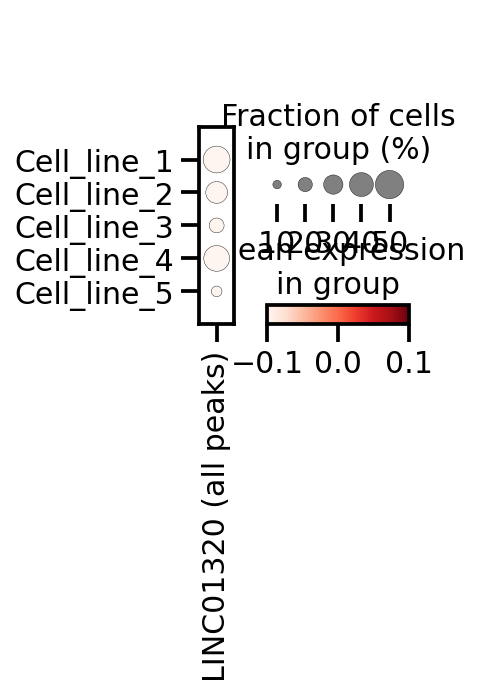

In [98]:
ac.pl.dotplot(mdata, marker_joint,standard_scale='group', groupby='annotated')

# Assigning cell type labels

In [ ]:
new_cluster_names = {
    "0": "Cell_line_1",
    "1": "Cell_line_1",
    "2": "Cell_line_1"",
    "3": "Cell_line_1"",
    "4": "Cell_line_1",
}

mdata.obs['annotated'] = mdata.obs.leiden_joint.astype("str")
mdata.obs.celltype = mdata.obs.celltype.map(new_cluster_names).astype("category")

In [ ]:
mdata.obs.celltype.cat.categories

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(mdata.obs.celltype.cat.categories)))

mdata.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))

In [ ]:
mu.pl.umap(mdata, color="celltype", legend_loc="on data", frameon=False)

# Visualising markers


In [ ]:
mdata['rna'].obs['annotated_joint'] = mdata.obs.celltype
mdata['atac'].obs['annotated_joint'] = mdata.obs.celltype

In [ ]:
marker_genes = [

]

In [ ]:
sc.pl.dotplot(mdata['rna'], marker_genes, 'annotated_joint')

In [ ]:
marker_peaks = [                          
]

In [ ]:
sc.pl.dotplot(mdata['atac'], marker_peaks, 'annotated_joint')

# Saving

In [ ]:
mdata.write("Cell_lines_annotated.h5mu")